# Detailed Exploratory Data Analysis

Note: This notebook continues on from the previous notebook titled "Wine Data Cleaning and Initial EDA"

### Importing libraries and datasets

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cleaning_functions as cf 

# Relative path to the CSV files
red_file_path = '../data/cleaned/winequality_red_cleaned.csv'  # Go up one level with '..', then into 'data/raw/'
white_file_path = '../data/cleaned/winequality_white_cleaned.csv' 
red_df = pd.read_csv(red_file_path)
white_df = pd.read_csv(white_file_path)

### Combining red and white dataframes

In [13]:
red_df

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
#Adding wine type column to each dataframe
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

# Concatenate the two DataFrames into one
combined_df = pd.concat([red_df, white_df], axis=0)

#Dropping "Unamed: 0" column
combined_df.drop('Unnamed: 0', axis=1, inplace=True)

# Reset the index of the new DataFrame
combined_df.reset_index(drop=True, inplace=True)

In [15]:
combined_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [16]:
# Convert colour ('red' or 'white') strings to integers 

categorical_nominals = combined_df.select_dtypes(include=object)
categorical_nominals = pd.get_dummies(categorical_nominals)
categorical_nominals = categorical_nominals.astype(int)

In [17]:
# Concat red and white integers with main dataframe

combined_df = pd.concat([categorical_nominals,combined_df], axis=1) 

In [21]:
# Drop red and white as strings in main dataframe 

combined_df = combined_df.select_dtypes(exclude='object')  # Select numeric columns

# Reset the index of the new DataFrame

combined_df.reset_index(drop=True, inplace=True)

In [22]:
combined_df

,wine_type_red,wine_type_white,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,1,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,1,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,1,0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,0,1,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
5316,0,1,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
5317,0,1,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
5318,0,1,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [23]:
combined_df.to_csv('../data/cleaned/winequality_combined_cleaned.csv',index=False)

### Distributions

<Figure size 1500x1500 with 0 Axes>

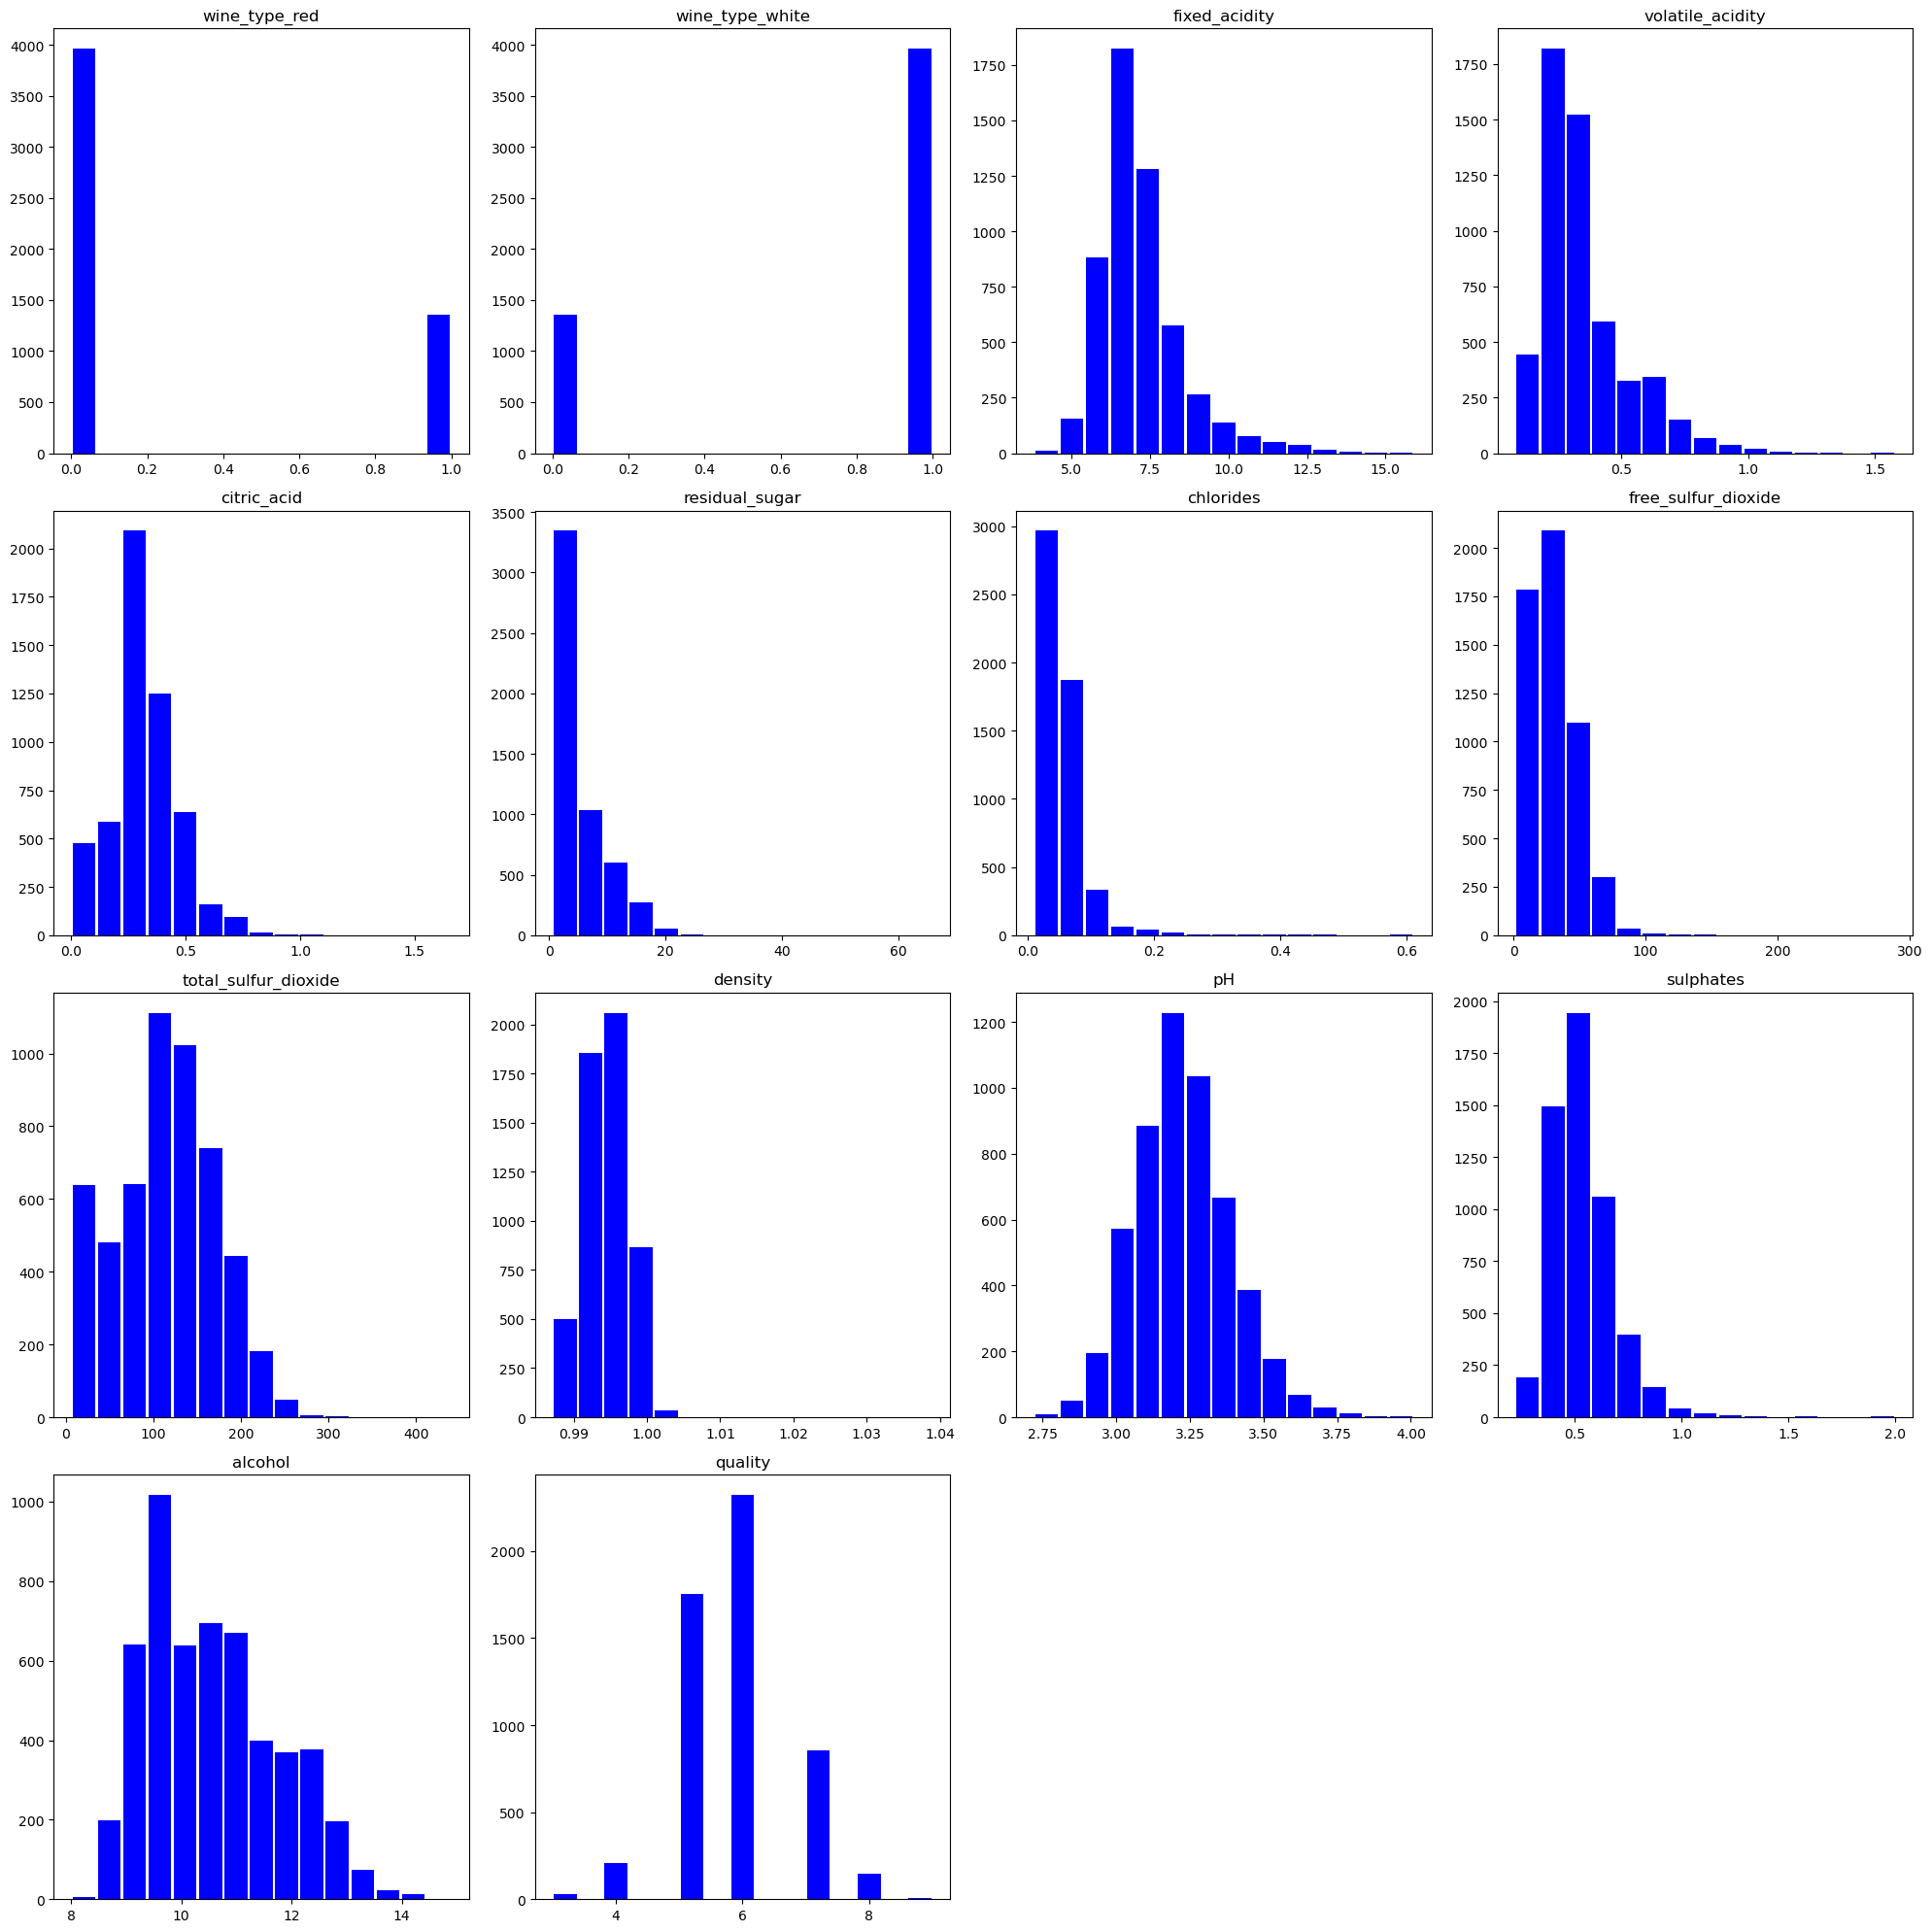

In [20]:
plt.figure(figsize=(15, 15))
combined_df.hist(bins=15, grid=False, figsize=(20, 20), color='blue', zorder=2, rwidth=0.9)
plt.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.show()
